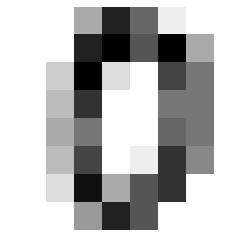

In [14]:
from time import time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets, metrics
from sklearn.cluster import AgglomerativeClustering

digits = datasets.load_digits(n_class=10)

# visualize the digits
plt.gray()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.axis('off')
plt.show()

In [15]:
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

print((n_samples, n_features))

(1797, 64)


In [16]:
def nudge_images(X, y):
    # A larger dataset shows more clearly the behavior of the
    # methods. Here, we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are linear in n_samples,
    # that is, as the size of the input dataset goes, the cost of computation
    # increases linearly.
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

# verify that the dataset is 2x as large
print(X.shape)

(3594, 64)


In [17]:
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()
    
# Print relevant metrics
def print_metrics(X_red, y, pred_labels):
    print("The homogeneity score is: %f" % metrics.homogeneity_score(y, pred_labels))
    print("The completeness score is: %f" % metrics.completeness_score(y, pred_labels))
    print("The v Measure score is: %f" % metrics.v_measure_score(y, pred_labels))
    print("The adjusted rand score is: %f" % metrics.adjusted_rand_score(y, pred_labels))
    print("The adjusted mutual info score is: %f" % metrics.adjusted_mutual_info_score(y, pred_labels))
    print("The silhouette score is: %f" % metrics.silhouette_score(X_red, pred_labels))
    


In [18]:
# Use SpectralEmbedding to perform dimensionality reduction
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

Computing embedding
Done.


In [19]:
X_red.shape

(3594, 2)

ward : 0.50s
The homogeneity score is: 0.508551
The completeness score is: 0.530165
The v Measure score is: 0.519133
The adjusted rand score is: 0.370016
The adjusted mutual info score is: 0.506116
The silhouette score is: 0.378443

average : 0.39s
The homogeneity score is: 0.462609
The completeness score is: 0.601724
The v Measure score is: 0.523075
The adjusted rand score is: 0.345764
The adjusted mutual info score is: 0.460193
The silhouette score is: 0.318140

complete : 0.40s
The homogeneity score is: 0.471093
The completeness score is: 0.511839
The v Measure score is: 0.490622
The adjusted rand score is: 0.322649
The adjusted mutual info score is: 0.468466
The silhouette score is: 0.343862



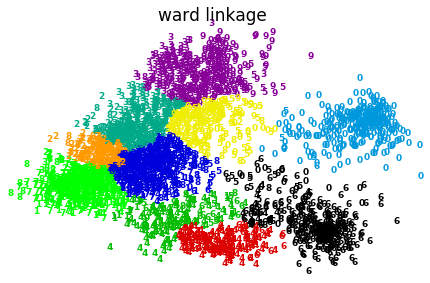

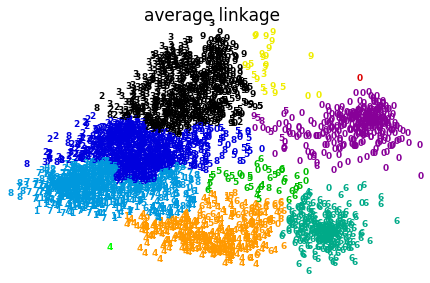

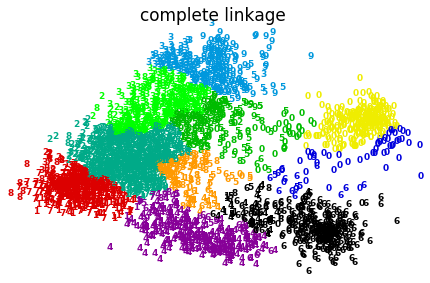

In [21]:
# So we went from 64 dimensions to 2 dimensions in the input dataset

# Now we do the hierachical (or agglomerative clustering) with three different
# linkage methods

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))
    pred_labels = clustering.fit_predict(X_red)
    print_metrics(X_red, y, pred_labels)
    print()
    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()